In [17]:
import os
from skimage import io
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import shutil
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
import seaborn as sns

In [19]:
batch_size = 32
img_height = 300
img_width = 200

In [ ]:
classes_weights = tf.constant([0.1, 1.0])
cross_entropy = tf.nn.weighted_cross_entropy_with_logits(logits=logits, targets=labels, pos_weight=classes_weights)

In [3]:
num_classes = 3
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 7, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [4]:
def get_model_name():
    import time
    run=time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return run

In [5]:
recall=tf.keras.metrics.Recall(class_id=None)

In [6]:
root_logdir=os.path.join(os.curdir, 'my_logs')

In [7]:
def get_run_logdir():
    import time
    run_id=time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [72]:
run_logdir=get_run_logdir()
model_name=get_model_name()

In [15]:
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-5 less"
        min_delta=1e-5,
        # "no longer improving" being further defined as "for at least 30 epochs"
        patience=45,
        verbose=1,), 
    keras.callbacks.TensorBoard(run_logdir,
                              histogram_freq=2,
                              write_graph=True,
                              write_images=True),
    keras.callbacks.ModelCheckpoint(filepath='models/'+model_name ,save_best_only=True)]

In [20]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=30, width_shift_range=0.3,
    height_shift_range=0.3, fill_mode='nearest', cval=0.0,
    horizontal_flip=True, vertical_flip=False, zoom_range=0.25, brightness_range=(0.6, 1.4))
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator()

In [56]:
train_generator = train_datagen.flow_from_directory(
        'plants/train',
        target_size=(300, 200),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'plants/val',
        target_size=(300, 200),
        batch_size=32,
        class_mode='categorical')

Found 1968 images belonging to 3 classes.
Found 422 images belonging to 3 classes.


In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[recall])

In [24]:
epochs=400
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
    callbacks=[callbacks])

Epoch 1/400
 1/62 [..............................] - ETA: 0s - loss: 1.1037 - recall: 0.0000e+00WARNING:tensorflow:From /Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
62/62 [==============================] - ETA: 0s - loss: 0.8582 - recall: 0.6286WARNING:tensorflow:From /Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets writt

62/62 [==============================] - 166s 3s/step - loss: 0.7095 - recall: 0.6723 - val_loss: 0.6955 - val_recall: 0.6706
Epoch 37/400
62/62 [==============================] - 166s 3s/step - loss: 0.7051 - recall: 0.6570 - val_loss: 0.7272 - val_recall: 0.5427
Epoch 38/400
62/62 [==============================] - 166s 3s/step - loss: 0.7038 - recall: 0.6621 - val_loss: 0.7135 - val_recall: 0.6754
Epoch 39/400
62/62 [==============================] - 166s 3s/step - loss: 0.7022 - recall: 0.6728 - val_loss: 0.6998 - val_recall: 0.6066
Epoch 40/400
62/62 [==============================] - 166s 3s/step - loss: 0.7002 - recall: 0.6657 - val_loss: 0.7019 - val_recall: 0.6943
Epoch 41/400
62/62 [==============================] - 166s 3s/step - loss: 0.7095 - recall: 0.6768 - val_loss: 0.7035 - val_recall: 0.6090
Epoch 42/400
62/62 [==============================] - 188s 3s/step - loss: 0.6917 - recall: 0.6606 - val_loss: 0.7143 - val_recall: 0.6185
Epoch 43/400
62/62 [====================

62/62 [==============================] - 232s 4s/step - loss: 0.6516 - recall: 0.7093 - val_loss: 0.7045 - val_recall: 0.6445
Epoch 89/400
62/62 [==============================] - 241s 4s/step - loss: 0.6519 - recall: 0.6972 - val_loss: 0.6820 - val_recall: 0.6730
Epoch 90/400
62/62 [==============================] - 243s 4s/step - loss: 0.6267 - recall: 0.7200 - val_loss: 0.6677 - val_recall: 0.6564
Epoch 91/400
62/62 [==============================] - 247s 4s/step - loss: 0.6142 - recall: 0.7149 - val_loss: 0.6334 - val_recall: 0.7156
Epoch 92/400
62/62 [==============================] - 248s 4s/step - loss: 0.6170 - recall: 0.7236 - val_loss: 0.6286 - val_recall: 0.7370
Epoch 93/400
62/62 [==============================] - 243s 4s/step - loss: 0.6220 - recall: 0.7149 - val_loss: 0.6471 - val_recall: 0.6777
Epoch 94/400
62/62 [==============================] - 235s 4s/step - loss: 0.6261 - recall: 0.7170 - val_loss: 0.6300 - val_recall: 0.7133
Epoch 95/400
62/62 [====================

Epoch 137/400
62/62 [==============================] - 235s 4s/step - loss: 0.5119 - recall: 0.7749 - val_loss: 0.6258 - val_recall: 0.7275
Epoch 138/400
62/62 [==============================] - 240s 4s/step - loss: 0.5367 - recall: 0.7510 - val_loss: 0.6100 - val_recall: 0.7299
Epoch 139/400
62/62 [==============================] - 243s 4s/step - loss: 0.5264 - recall: 0.7617 - val_loss: 0.6382 - val_recall: 0.7393
Epoch 140/400
62/62 [==============================] - 245s 4s/step - loss: 0.5215 - recall: 0.7536 - val_loss: 0.6418 - val_recall: 0.7156
Epoch 141/400
62/62 [==============================] - 243s 4s/step - loss: 0.5203 - recall: 0.7591 - val_loss: 0.6047 - val_recall: 0.6991
Epoch 142/400
62/62 [==============================] - 246s 4s/step - loss: 0.5118 - recall: 0.7622 - val_loss: 0.5939 - val_recall: 0.7346
Epoch 143/400
62/62 [==============================] - 247s 4s/step - loss: 0.5143 - recall: 0.7622 - val_loss: 0.5820 - val_recall: 0.7441
Epoch 144/400
62/62 

Epoch 189/400
62/62 [==============================] - 241s 4s/step - loss: 0.5048 - recall: 0.7866 - val_loss: 0.6743 - val_recall: 0.7441
Epoch 190/400
62/62 [==============================] - 247s 4s/step - loss: 0.5042 - recall: 0.7785 - val_loss: 0.5769 - val_recall: 0.7536
Epoch 191/400
62/62 [==============================] - 242s 4s/step - loss: 0.4622 - recall: 0.7937 - val_loss: 0.5612 - val_recall: 0.7370
Epoch 192/400
62/62 [==============================] - 252s 4s/step - loss: 0.4460 - recall: 0.7998 - val_loss: 0.6191 - val_recall: 0.7725
Epoch 193/400
62/62 [==============================] - 243s 4s/step - loss: 0.4320 - recall: 0.8044 - val_loss: 0.6088 - val_recall: 0.7607
Epoch 194/400
62/62 [==============================] - 241s 4s/step - loss: 0.4412 - recall: 0.8135 - val_loss: 0.5811 - val_recall: 0.7773
Epoch 195/400
62/62 [==============================] - 235s 4s/step - loss: 0.4254 - recall: 0.8115 - val_loss: 0.5463 - val_recall: 0.7844
Epoch 196/400
62/62 

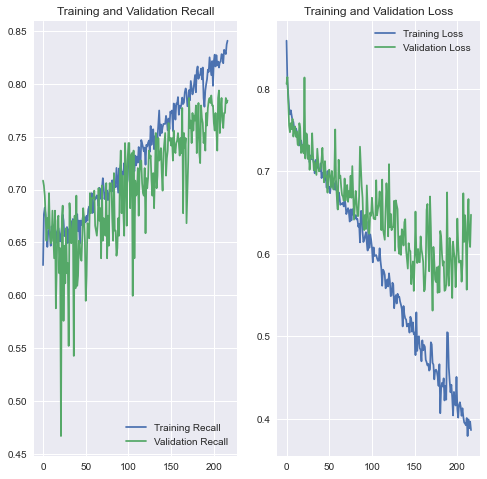

In [25]:
plt.style.use('seaborn')
acc = history.history['recall']
val_acc = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Recall')
plt.plot(epochs_range, val_acc, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('graphs/simplemodel128x2aug_zoom_bright.png', bbox_inches='tight')
plt.show()

In [26]:
test_generator = test_datagen.flow_from_directory(
        'plants/test',
        target_size=(300, 200),
        batch_size=16,
        shuffle=False,
        class_mode='categorical')

Found 424 images belonging to 3 classes.


In [27]:
ben_plants = os.listdir('plants/test/Benign_Plants')
ivy=os.listdir('plants/test/Poison_Ivy/')
oak=os.listdir('plants/test/Poison_Oak')

In [28]:
y_true=pd.DataFrame()
for i in range(len(ben_plants)):
    num=pd.Series([1,0,0])
    y_true= y_true.append(num, ignore_index=True)
for j in range(len(ivy)):
    num=pd.Series([0,1,0])
    y_true= y_true.append(num, ignore_index=True)
for k in range(len(oak)):
    num=pd.Series([0,0,1])
    y_true= y_true.append(num, ignore_index=True)

In [29]:
y_hat=(model.predict(test_generator, verbose=1))

27/27 [==============================] - 9s 346ms/step


In [31]:
y_pred=np.argmax(y_hat, axis=1)
y_s=np.argmax(np.array(y_true), axis=1)
c_mat=confusion_matrix(y_s, y_pred)
percent=(c_mat/(np.sum(c_mat, axis=1).reshape(3,-1))).reshape(3,3)

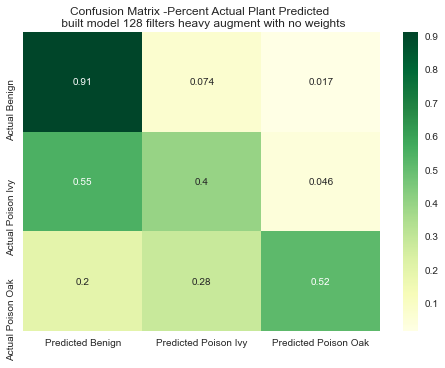

In [32]:
predicted_cat=['Predicted Benign', 'Predicted Poison Ivy', 'Predicted Poison Oak']
real_cat=['Actual Benign', 'Actual Poison Ivy', 'Actual Poison Oak']
sns.heatmap(percent, annot=percent, cmap='YlGn', 
            xticklabels=predicted_cat, 
            yticklabels=real_cat).set_title('Confusion Matrix -Percent Actual Plant Predicted \n built model 128 filters heavy augment with no weights');
plt.savefig('graphs/simplemodel128x2_2aug_zoom_bright.png', bbox_inches='tight')

In [33]:
def print_model_properties(model, indices = 0):
     for i, layer in enumerate(model.layers[indices:]):
        print("Layer {} | Name: {} | Trainable: {}".format(i+indices, layer.name, layer.trainable))

In [75]:
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-5 less"
        min_delta=1e-3,
        # "no longer improving" being further defined as "for at least 30 epochs"
        patience=60,
        verbose=1,), 
    keras.callbacks.TensorBoard(run_logdir,
                              histogram_freq=2,
                              write_graph=True,
                              write_images=True),
    keras.callbacks.ModelCheckpoint(filepath='models/'+model_name ,save_best_only=True)]

In [69]:
optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

In [36]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=30, width_shift_range=0.3,
    height_shift_range=0.3, fill_mode='nearest', cval=0.0,
    horizontal_flip=True, vertical_flip=False, zoom_range=0.25, brightness_range=(0.75, 1.25))
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator()

In [65]:
model.pop()


In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 300, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 200, 64)      9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 100, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 25, 128)       0

In [67]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.3)) 
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [39]:
print_model_properties(model)

Layer 0 | Name: rescaling | Trainable: True
Layer 1 | Name: conv2d | Trainable: True
Layer 2 | Name: max_pooling2d | Trainable: True
Layer 3 | Name: conv2d_1 | Trainable: True
Layer 4 | Name: max_pooling2d_1 | Trainable: True
Layer 5 | Name: conv2d_2 | Trainable: True
Layer 6 | Name: max_pooling2d_2 | Trainable: True
Layer 7 | Name: conv2d_3 | Trainable: True
Layer 8 | Name: max_pooling2d_3 | Trainable: True


In [40]:
model.add(layers.Dropout(0.3)) 
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [41]:
def change_trainable_layers(model, trainable_index):
    for layer in model.layers[:trainable_index]:
        layer.trainable = False
    for layer in model.layers[trainable_index:]:
        layer.trainable = True

In [74]:
print_model_properties(model)

Layer 0 | Name: rescaling | Trainable: True
Layer 1 | Name: conv2d | Trainable: True
Layer 2 | Name: max_pooling2d | Trainable: True
Layer 3 | Name: conv2d_1 | Trainable: True
Layer 4 | Name: max_pooling2d_1 | Trainable: True
Layer 5 | Name: conv2d_2 | Trainable: True
Layer 6 | Name: max_pooling2d_2 | Trainable: True
Layer 7 | Name: conv2d_3 | Trainable: True
Layer 8 | Name: max_pooling2d_3 | Trainable: True
Layer 9 | Name: flatten_1 | Trainable: True
Layer 10 | Name: dropout_1 | Trainable: True
Layer 11 | Name: dense_4 | Trainable: True
Layer 12 | Name: dense_5 | Trainable: True


In [73]:
change_trainable_layers(model, 0)

In [70]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[recall])

In [76]:
weight_for_0 = (1 / 1800)*(2200)/2.0 
weight_for_1 = (1 / 400)*(2200)/2.0
weight_for_2 = (1/400)*(2200)/2.0
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

In [78]:
weight_for_0

0.6111111111111112

In [79]:
epochs=600
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
    callbacks=[callbacks], class_weight=class_weight)

Epoch 1/600
62/62 [==============================] - 67s 1s/step - loss: 1.1083 - recall: 0.5432 - val_loss: 0.7351 - val_recall: 0.5308
Epoch 2/600
62/62 [==============================] - 66s 1s/step - loss: 1.0337 - recall: 0.5279 - val_loss: 0.7088 - val_recall: 0.5853
Epoch 3/600
62/62 [==============================] - 65s 1s/step - loss: 1.0047 - recall: 0.5711 - val_loss: 0.7377 - val_recall: 0.5592
Epoch 4/600
62/62 [==============================] - 65s 1s/step - loss: 0.9815 - recall: 0.5752 - val_loss: 0.7146 - val_recall: 0.5900
Epoch 5/600
62/62 [==============================] - 66s 1s/step - loss: 0.9545 - recall: 0.5864 - val_loss: 0.7068 - val_recall: 0.5995
Epoch 6/600
62/62 [==============================] - 66s 1s/step - loss: 0.9337 - recall: 0.5996 - val_loss: 0.6865 - val_recall: 0.6114
Epoch 7/600
62/62 [==============================] - 65s 1s/step - loss: 0.9374 - recall: 0.6108 - val_loss: 0.7073 - val_recall: 0.6043
Epoch 8/600
62/62 [======================

62/62 [==============================] - 65s 1s/step - loss: 0.7085 - recall: 0.7058 - val_loss: 0.6271 - val_recall: 0.7109
Epoch 50/600
62/62 [==============================] - 65s 1s/step - loss: 0.7132 - recall: 0.7180 - val_loss: 0.6320 - val_recall: 0.7014
Epoch 51/600
62/62 [==============================] - 65s 1s/step - loss: 0.6965 - recall: 0.7185 - val_loss: 0.6278 - val_recall: 0.7062
Epoch 52/600
62/62 [==============================] - 64s 1s/step - loss: 0.6937 - recall: 0.7302 - val_loss: 0.6242 - val_recall: 0.7204
Epoch 53/600
62/62 [==============================] - 65s 1s/step - loss: 0.7011 - recall: 0.7180 - val_loss: 0.6428 - val_recall: 0.7085
Epoch 54/600
62/62 [==============================] - 65s 1s/step - loss: 0.7002 - recall: 0.7185 - val_loss: 0.6342 - val_recall: 0.7038
Epoch 55/600
62/62 [==============================] - 65s 1s/step - loss: 0.6806 - recall: 0.7276 - val_loss: 0.6177 - val_recall: 0.7204
Epoch 56/600
62/62 [===========================

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 300, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 200, 64)      9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 100, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 25, 128)       0

In [80]:
y_hat=(model.predict(test_generator, verbose=1))

27/27 [==============================] - 9s 345ms/step


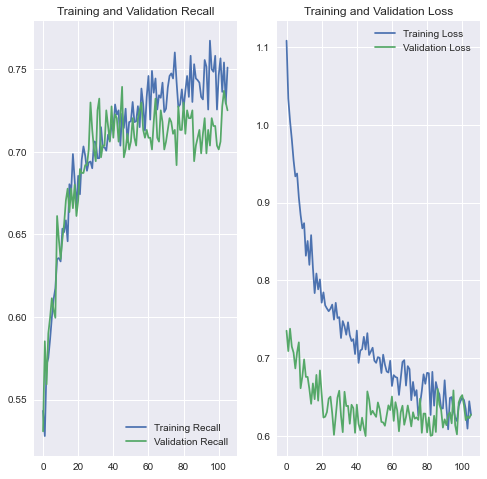

In [81]:
plt.style.use('seaborn')
acc = history.history['recall']
val_acc = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Recall')
plt.plot(epochs_range, val_acc, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('graphs/simplemodel128x2aug_zw.png', bbox_inches='tight')
plt.show()

In [83]:
y_pred=np.argmax(y_hat, axis=1)
y_s=np.argmax(np.array(y_true), axis=1)
c_mat=confusion_matrix(y_s, y_pred)
percent=(c_mat/(np.sum(c_mat, axis=1).reshape(3,-1))).reshape(3,3)

In [97]:
percent

array([[0.78929766, 0.12040134, 0.090301  ],
       [0.24615385, 0.6       , 0.15384615],
       [0.11666667, 0.16666667, 0.71666667]])

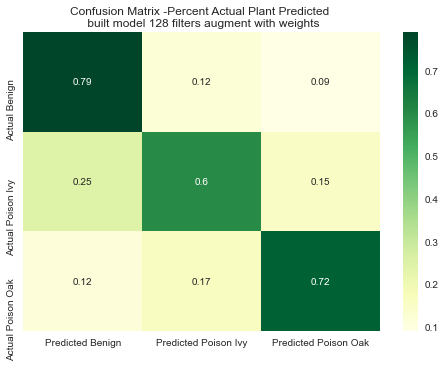

In [84]:
predicted_cat=['Predicted Benign', 'Predicted Poison Ivy', 'Predicted Poison Oak']
real_cat=['Actual Benign', 'Actual Poison Ivy', 'Actual Poison Oak']
sns.heatmap(percent, annot=percent, cmap='YlGn', 
            xticklabels=predicted_cat, 
            yticklabels=real_cat).set_title('Confusion Matrix -Percent Actual Plant Predicted \n built model 128 filters augment with weights');
plt.savefig('graphs/simplemodel128x2_2aug_zb_weights.png', bbox_inches='tight')

In [101]:
threshold_range=np.arange(-0.99, -0.01, 0.01)

In [88]:
def percent_change(y_true_, y_hat_, thresh):
    benign_percent=[]
    ivy_percent=[]
    oak_percent=[]
    y_true=y_true_
    for num in thresh:
        y_hat=pd.DataFrame(y_hat_)
        y_hat[0]=y_hat[0].apply(lambda x: x + num)
        y_pred=np.argmax(y_hat.values, axis=1)
        y_s=np.argmax(np.array(y_true), axis=1)
        c_mat=confusion_matrix(y_s, y_pred)
        percent=(c_mat/(np.sum(c_mat, axis=1).reshape(3,-1))).reshape(3,3)
        benign_percent.append(percent[0,0])
        ivy_percent.append(percent[1,1]+percent[1,2])
        oak_percent.append(percent[2,1]+percent[2,2])
    return benign_percent, ivy_percent, oak_percent

In [102]:
benign_percent, ivy_percent, oak_percent=percent_change(y_true, y_hat, threshold_range)
np.argmax(np.array(benign_percent)+np.array(ivy_percent)+np.array(oak_percent))

80

In [103]:
threshold_range[80]

-0.18999999999999928

In [104]:
title_font = {'weight' : 'normal',
        'size'   : 20}
axis_font={'weight' : 'light',
        'size'   : 14}
legend_font={'weight' : 'light',
        'size'   : 8}

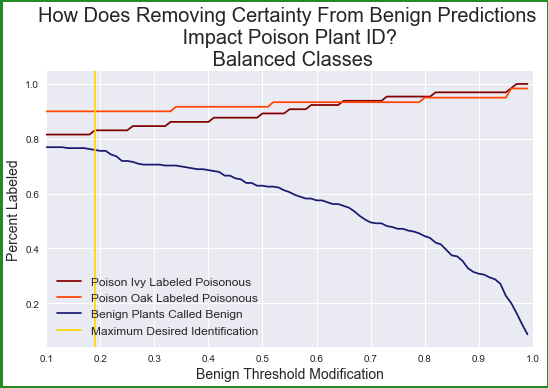

In [107]:
fig,ax=plt.subplots(linewidth=5, edgecolor="forestgreen")
ax.plot(threshold_range*-1,ivy_percent, label="Poison Ivy Labeled Poisonous", color="maroon")
ax.plot(threshold_range*-1,oak_percent, label="Poison Oak Labeled Poisonous", color="orangered")
ax.plot(threshold_range*-1,benign_percent, label="Benign Plants Called Benign", color='midnightblue')
ax.set_xlabel("Benign Threshold Modification", fontdict=axis_font)
ax.set_ylabel("Percent Labeled", fontdict=axis_font)
ax.axvline(threshold_range[80]*-1, label='Maximum Desired Identification', color='gold')
ax.set_xlim(0.1, 1.0)
ax.legend(loc=3, fontsize=12)
ax.set_title("How Does Removing Certainty From Benign Predictions \n Impact Poison Plant ID? \n Balanced Classes", fontdict=title_font)
plt.tight_layout();

In [108]:
y_pred=np.argmax(y_hat, axis=1)
y_s=np.argmax(np.array(y_true), axis=1)
c_mat=confusion_matrix(y_s, y_pred)
percent=(c_mat/(np.sum(c_mat, axis=1).reshape(3,-1))).reshape(3,3)

In [115]:
y_hat_=pd.DataFrame(y_hat)
y_hat_[0]=y_hat_[0].apply(lambda x: x + -0.40)
y_pred_=np.argmax(np.array(y_hat_), axis=1)
y_s_=np.argmax(np.array(y_true), axis=1)
c_mat_=confusion_matrix(y_s_, y_pred_)
percent_=(c_mat_/(np.sum(c_mat, axis=1).reshape(3,-1))).reshape(3,3)

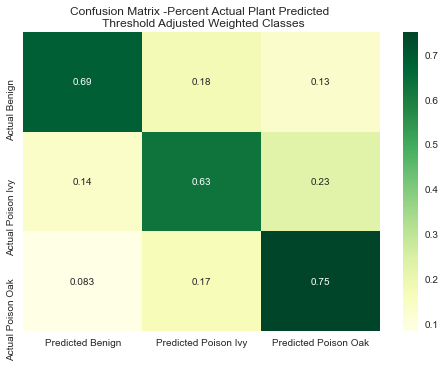

In [116]:
predicted_cat=['Predicted Benign', 'Predicted Poison Ivy', 'Predicted Poison Oak']
real_cat=['Actual Benign', 'Actual Poison Ivy', 'Actual Poison Oak']
sns.heatmap(percent_, annot=percent_, cmap='YlGn', 
            xticklabels=predicted_cat, 
            yticklabels=real_cat).set_title('Confusion Matrix -Percent Actual Plant Predicted \n Threshold Adjusted Weighted Classes');
plt.savefig('graphs/simplemodelwt_mod', bbox_inches='tight')

In [94]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(7, 7, 3, 64) dtype=float32, numpy=
 array([[[[-1.18468232e-01, -4.41851700e-03, -4.10570530e-03, ...,
            6.43642992e-02, -4.91454862e-02,  5.22773638e-02],
          [ 2.56512128e-03, -4.76694368e-02, -1.22667030e-02, ...,
           -1.55320480e-01, -4.68342453e-02,  8.13196078e-02],
          [ 1.37664499e-02,  1.03159035e-02, -4.78441268e-03, ...,
            2.20970158e-02, -3.77228744e-02, -5.84204309e-03]],
 
         [[-1.42979831e-01,  1.05814375e-02, -1.94810834e-02, ...,
            9.58113149e-02,  8.13298672e-03, -1.62334666e-01],
          [ 7.57174566e-02, -1.62854455e-02, -2.53344048e-02, ...,
           -1.15069933e-01, -2.46010721e-02, -8.00494626e-02],
          [ 7.94058607e-04, -3.10976431e-03, -5.53425401e-02, ...,
            1.82167552e-02,  2.99352803e-03, -1.11600287e-01]],
 
         [[-1.14872210e-01, -6.37148097e-02, -2.70819403e-02, ...,
            1.17197841e-01,  1.79508573e-03, -2.05674469e-01],
          

In [96]:
dense_3.get_weights()

NameError: name 'dense_3' is not defined

In [98]:
brain_percent=[[0.05, 0.4925, 0.4925  ],
       [0.05, 0.4925, 0.4925],
       [0.05, 0.4925, 0.4925]]

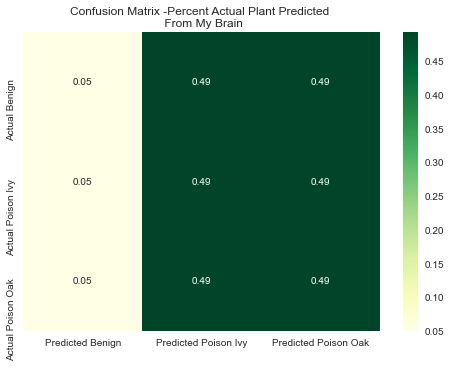

In [100]:
predicted_cat=['Predicted Benign', 'Predicted Poison Ivy', 'Predicted Poison Oak']
real_cat=['Actual Benign', 'Actual Poison Ivy', 'Actual Poison Oak']
sns.heatmap(brain_percent, annot=brain_percent, cmap='YlGn', 
            xticklabels=predicted_cat, 
            yticklabels=real_cat).set_title('Confusion Matrix -Percent Actual Plant Predicted \n From My Brain');
plt.savefig('graphs/my_brain_confusion', bbox_inches='tight')